In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Fish Trading
We are going to first exploit the model, try to understand some statistics.
First of all, number of fish one villager can catch follows the $ \textbf {geometric law} $with the parameter $p_t$ which means he catches $\frac{1-p_t}{p_t}$ fishes in average. The parameter $p_t = exp (-exp(\theta_t))$, where $\theta_{t+1} \sim \mathscr{N}(\mu+\kappa(\theta_t-\mu),\sigma)$. We can express $\theta$ as following:
$$
\theta_{t+1} - \theta_{t} = (1 - \kappa) (\mu - \theta_t) + \sigma \mathscr{N}(0,1)
$$
It has a differential form:
$$
d\theta_t = (1 - \kappa)(\mu - \theta_t)dt + \sigma dW_t
$$
We notice that this is an $\textit{Ornstein-Uhlenbeck process}$, who has a mean reverting property.
This property is confirmed by the following simulation.

In [2]:
mu,k,sigma = 0.3,0.99,0.012

In [3]:
n,m = 5, 365

In [4]:
theta = np.abs( np.random.randn(n) + 0.3 )

In [5]:
theta

array([0.57650786, 0.82753349, 0.09737051, 0.11098521, 0.14529029])

In [6]:
simu = np.zeros(n*m).reshape(n,m)

In [7]:
for i in range(m):
    simu[:,i] = theta
    theta = mu + k * (theta - mu) + sigma * np.random.randn(n)

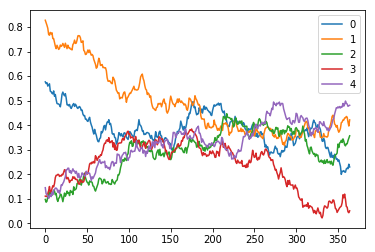

In [8]:
for i in range(n):
    plt.plot(np.arange(m),simu[i,:],label="{}".format(i))
plt.legend()
# plt.plot(np.arange(m),simu[1,:])
# plt.plot(np.arange(m),simu[2,:])
# plt.plot(np.arange(m),simu[3,:])
# plt.plot(np.arange(m),simu[4,:])

Now Let's see how $p_t$ evolves with $\theta_t$.

Please remark one interesting thing: the solution of the equation $ x = exp(-exp(x))$ is around 0.27, where $p_t$ is kind of stable.

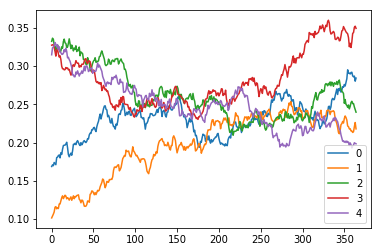

In [9]:
for i in range(n):
    plt.plot(np.arange(m), np.exp(-np.exp(simu[i,:])), label="{}".format(i))
plt.legend()

Now Let's see how the average evolves with $\theta_t$

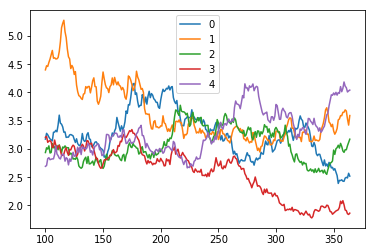

In [10]:
cut = 100
for i in range(n):
    p = np.exp(-np.exp(simu[i,:]))
    mean = (1-p)/p
    plt.plot(np.arange(cut,m), mean[cut:], label="{}".format(i))
plt.legend()

We should also study the standard:
We can remark that the standard diviance has almost the same size as mean.

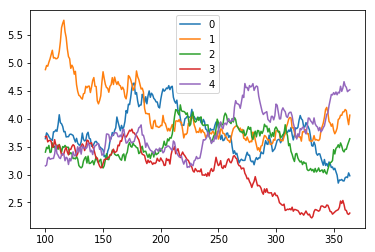

In [11]:
cut = 100
for i in range(n):
    p = np.exp(-np.exp(simu[i,:]))
    std = np.sqrt((1-p)/(p*p))
    plt.plot(np.arange(cut, m), std[cut:], label="{}".format(i))
plt.legend()

In [12]:
def get_survival_Probability(simu):
    p = np.exp(-np.exp(simu))
    survival = 1 - p - (1 - p) * p
    return survival

Define survival probability as $\mathbb{P}(fish \geq 2)$, let's see how survival probability evolve with $\theta_t$

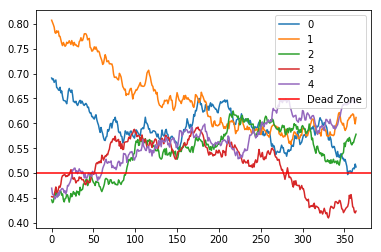

In [13]:
cut = 0
for i in range(n):
    survival = get_survival_Probability(simu[i,:])
    plt.plot(np.arange(cut,m), survival[cut:],label="{}".format(i))
plt.axhline(y=0.5,color='r',label='Dead Zone')
plt.legend(loc='upper right')

After the clearing each night, if we survive, we will have three informations:
- the number of survival villegers
- the price of fixing
- exchanged volume

The purpose is to estimate the parameter $\theta_t$

Denote by $N_t$ number of survival at time t, and denote by $M_t$ number of fish exchanged.

We now that $\frac{N_t-M_t}{N_{t-1}} \leq \mathbb{P}(\text{Number of villegers who have more than 2 fish}) \leq \frac{N_t-M_t/2}{N_{t-1}}$, so we have 
$$
\frac{N_t-M_t}{N_{t-1}} \leq 1-p_t-(1-p_t)p_t \leq \frac{N_t-M_t/2}{N_{t-1}}
$$
By solving the system, we have an upper and lower bound for $p_t$, if the bound is tight, then we have a good estimation of $p_t$